Link to Albert: https://colab.research.google.com/drive/1H-0Rd9lM4OV5VAICcyDq1axMx0-8qWMG?usp=sharing

Link to Study Final: https://colab.research.google.com/drive/17JuRJPbvj_acAO4ZYyaRoPoEh4p8DdPf?usp=sharing

Link to Train Final: https://colab.research.google.com/drive/1zM-fHN_alekzd1FFSTika1LBfbeshvm-?usp=sharing

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import zscore
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
import time
!pip install catboost

In [ ]:
def additional_info(df):
  print("\n",'*** Shape:',df.shape)

  print("\n",'*** Data:',df.head(10))

  print("\n","*** Columns:", df.columns)

  print("\n",'*** Info:')
  df.info()

  print("\n",'*** Missing values:')
  print(df.isnull().sum())


  print("\n",'*** Data Statistics:')
  print(df.describe(include='all'))

def scale(data):
    scaler = StandardScaler()
    scaled = scaler.fit_transform(data)
    dataset = DataFrame(scaled)
    return data
    #data = dataset.set_axis(, axis=1)
    

In [ ]:
data = pd.read_csv("mix_data.csv", low_memory=False)
columns = ['Patient ID','Alanine Aminotransferase (ALT)','Aspartate Aminotransferase (AST)', 'C-Reactive Protein (CRP)', 'Lactate Dehydrogenase (LDH)', 'White Blood cell Count (Leukocytes)', 'Lymphocyte Count', 'Neutrophil Count', 'Age', 'Platelets', 'Basophils', 'Eosinophils', 'Monocyte', 'Alkaline Phosphatase (ALP)', 'Gamma-glutamyltransferase (GGT)', 'Class']
data = data.set_axis(columns, axis=1)
additional_info(data)


 *** Shape: (7659, 16)

 *** Data:    Patient ID  Alanine Aminotransferase (ALT)  \
0        2588                             NaN   
1        4969                             NaN   
2        1574                             NaN   
3         232                             NaN   
4        2724                             NaN   
5         475                             NaN   
6        6637                       -0.427284   
7        2648                             NaN   
8        4054                             NaN   
9        4627                             NaN   

   Aspartate Aminotransferase (AST)  C-Reactive Protein (CRP)  \
0                               NaN                       NaN   
1                               NaN                       NaN   
2                               NaN                       NaN   
3                               NaN                       NaN   
4                               NaN                       NaN   
5                               Na

In [ ]:
data = data.drop(['Patient ID'], axis=1)
data.columns

Index(['Alanine Aminotransferase (ALT)', 'Aspartate Aminotransferase (AST)',
       'C-Reactive Protein (CRP)', 'Lactate Dehydrogenase (LDH)',
       'White Blood cell Count (Leukocytes)', 'Lymphocyte Count',
       'Neutrophil Count', 'Age', 'Platelets', 'Basophils', 'Eosinophils',
       'Monocyte', 'Alkaline Phosphatase (ALP)',
       'Gamma-glutamyltransferase (GGT)', 'Class'],
      dtype='object')

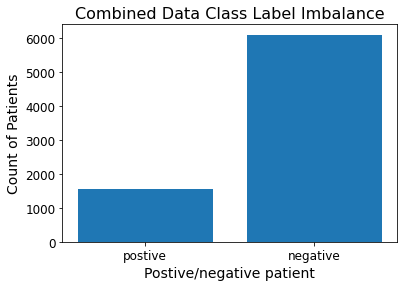

In [ ]:
count_neg = data.Class[data['Class'] == 0].size
count_pos = data.Class[data['Class'] == 1].size

plt.bar(['postive', 'negative'], [count_pos, count_neg])
plt.title('Combined Data Class Label Imbalance', fontsize=16)
plt.xlabel('Postive/negative patient',fontsize=14)
plt.ylabel('Count of Patients',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

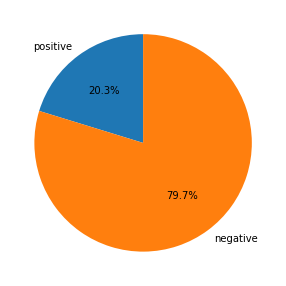

In [ ]:
labels = ['positive', 'negative']
sizes = [count_pos, count_neg]
fig1, ax1 = plt.subplots(1,1, figsize=(5,5))
wedges, text, autotexts = ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.show()

Imbalanced target variable

<Figure size 504x360 with 0 Axes>

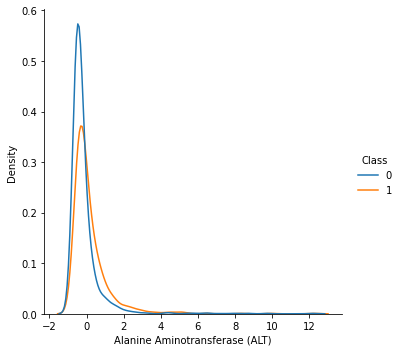

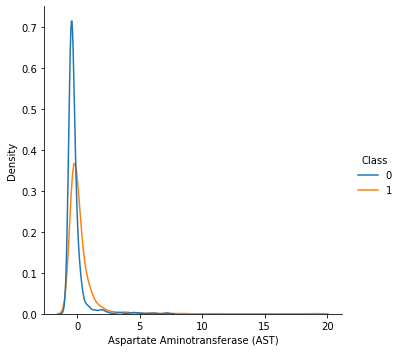

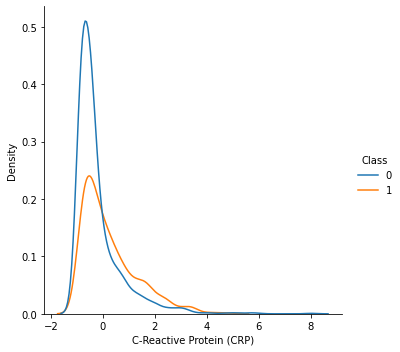

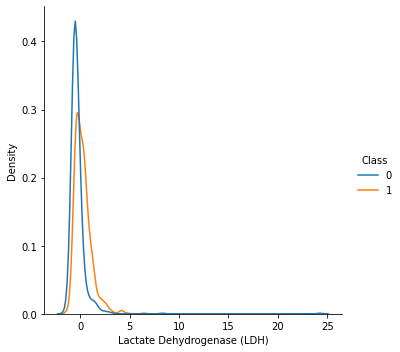

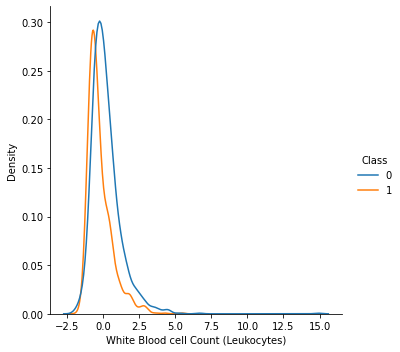

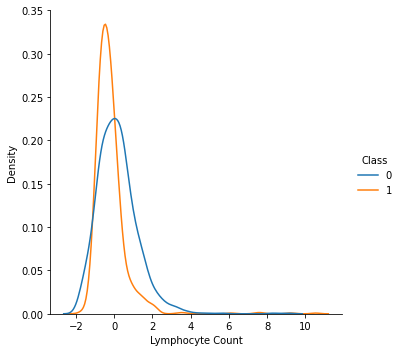

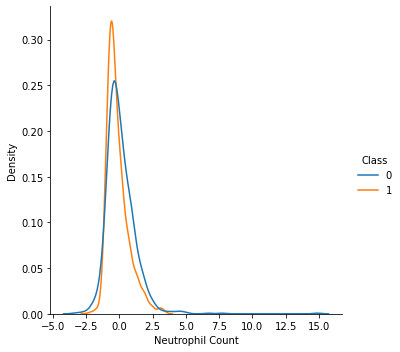

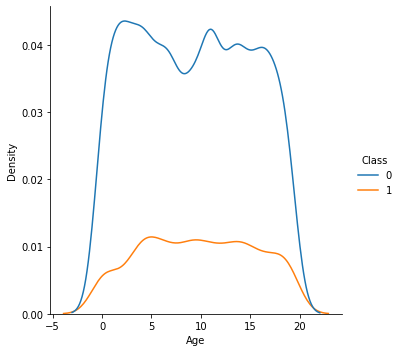

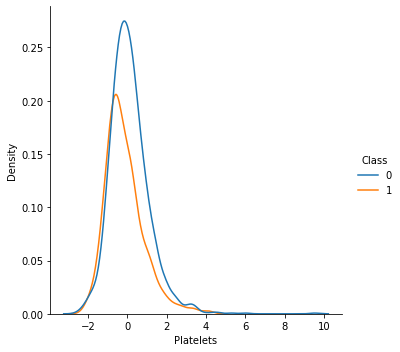

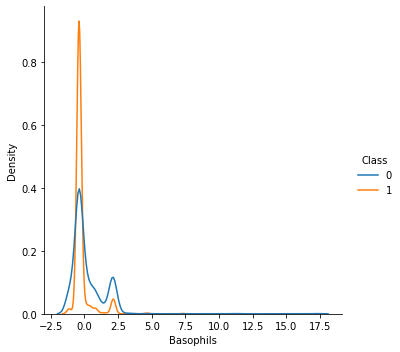

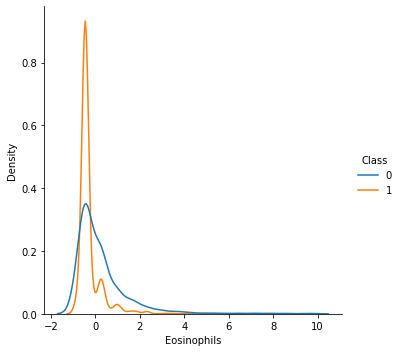

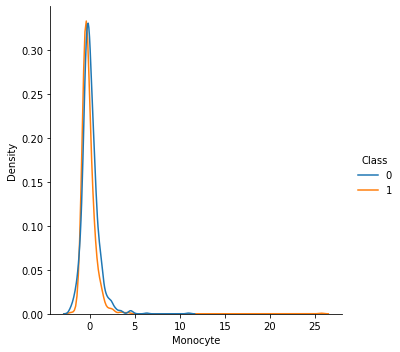

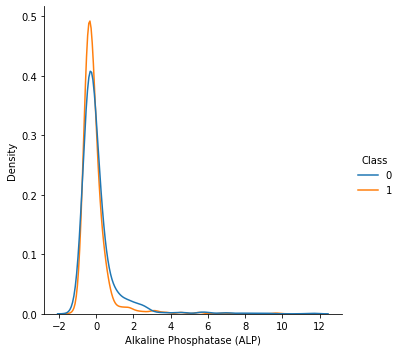

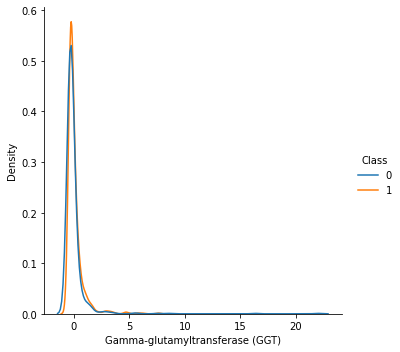

In [ ]:
columns = data.columns
fig = plt.figure(figsize=(7,5))
for i in range(len(data.columns)-1):
    sns.displot(data=data, x=columns[i], hue='Class', kind='kde')
plt.tight_layout
plt.show()

## Null Value Impute

#### KNN

In [ ]:
imputer = KNNImputer(n_neighbors=20)
impute = imputer.fit_transform(data)
data = pd.DataFrame(data=impute, columns=data.columns)
data.head(5)

,Alanine Aminotransferase (ALT),Aspartate Aminotransferase (AST),C-Reactive Protein (CRP),Lactate Dehydrogenase (LDH),White Blood cell Count (Leukocytes),Lymphocyte Count,Neutrophil Count,Age,Platelets,Basophils,Eosinophils,Monocyte,Alkaline Phosphatase (ALP),Gamma-glutamyltransferase (GGT),Class
0,-0.267972,-0.431632,0.145591,-0.386806,-0.011282,0.467701,-0.025813,6.0,0.656351,0.243077,0.490396,0.466751,-0.014682,-0.191002,0.0
1,-0.041700,-0.225367,0.032649,-0.167064,0.706795,-0.226029,0.139176,13.0,0.488463,0.362181,0.198956,0.498820,-0.190153,0.013666,0.0
2,-0.095142,-0.223481,-0.322438,-0.219921,-0.000429,0.214185,0.082606,9.0,0.100926,0.138386,0.109496,-0.087315,0.106196,0.606370,0.0
3,0.688216,1.505090,0.451621,0.634817,-0.187760,-0.374500,0.231840,7.0,0.360985,-0.299837,-0.185393,0.059447,0.029053,0.065266,1.0
4,-0.378398,-0.123857,-0.139654,-0.298911,0.263839,0.061291,0.263979,17.0,-0.398233,0.850427,0.212114,0.419583,0.401199,0.118469,0.0


## Outlier removal

#### Z Score Outlier Detection

In [ ]:
# Z Scores
new_data = data.copy(deep=True)
z_scores = abs(zscore(new_data))
filtered = (z_scores<3.0).all(axis=1)
new_df = new_data[filtered]
new_df.shape

(6845, 15)

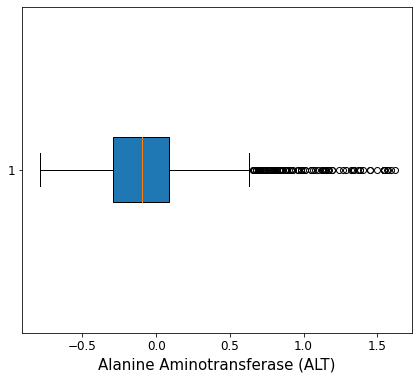

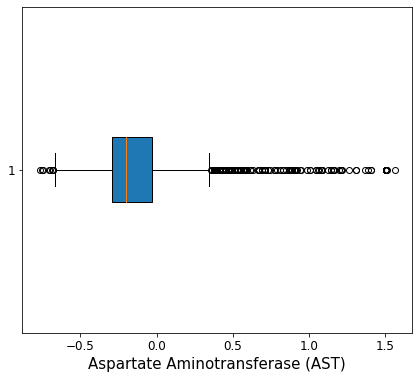

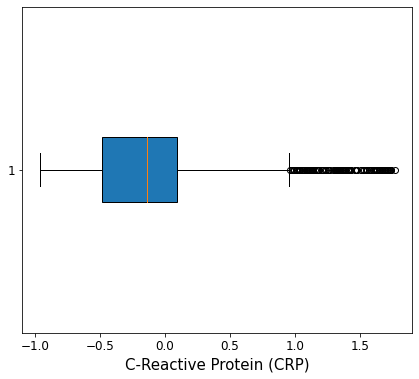

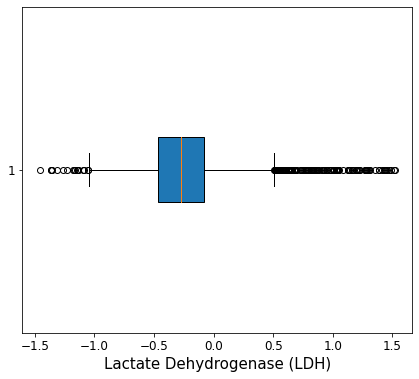

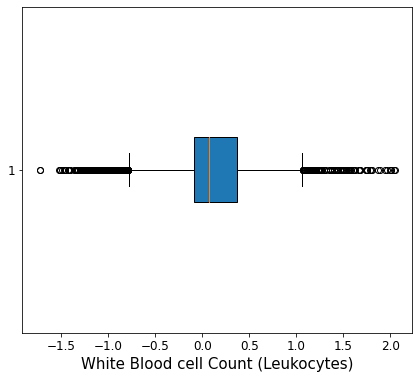

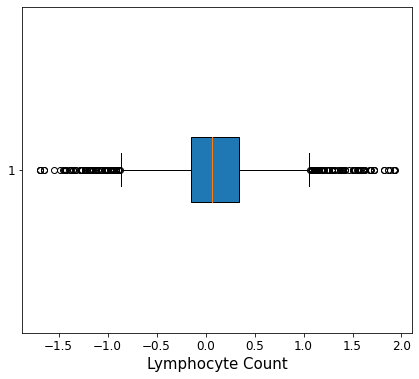

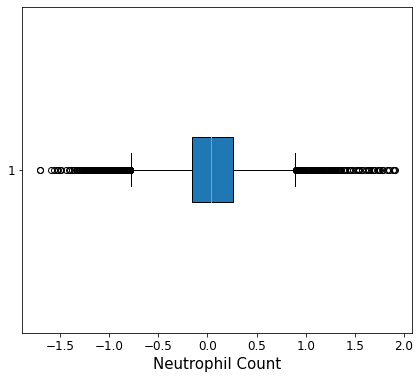

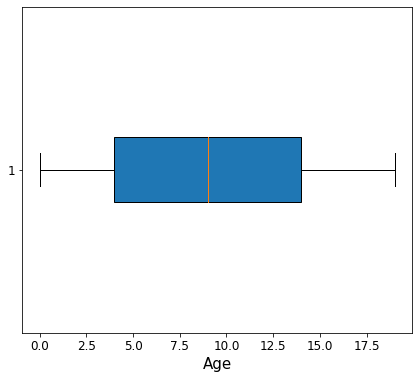

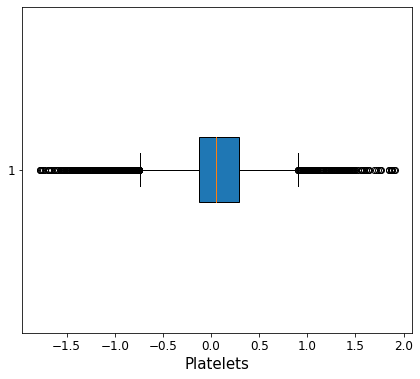

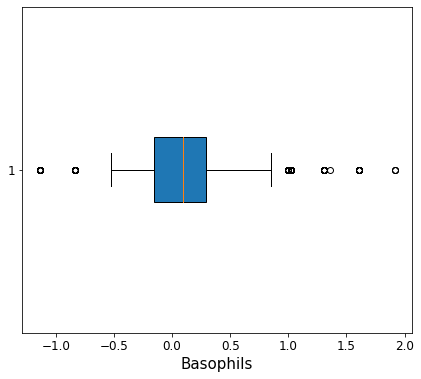

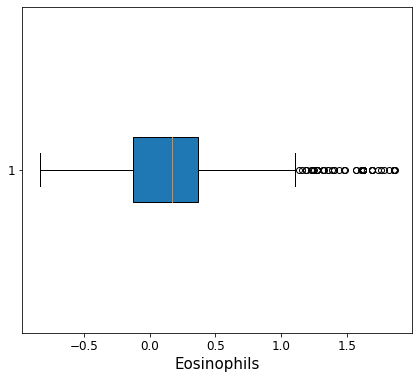

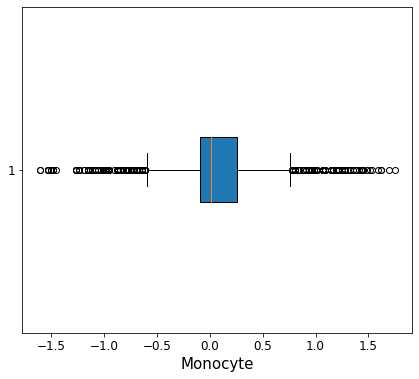

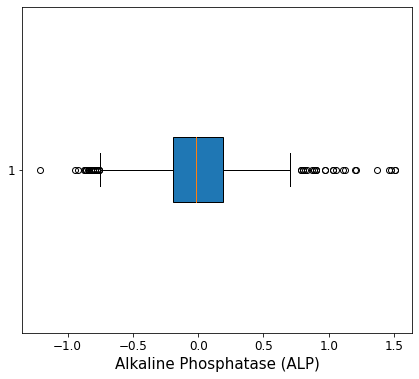

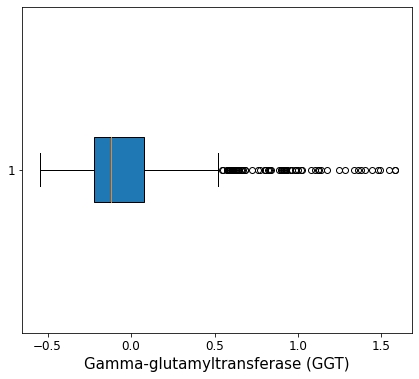

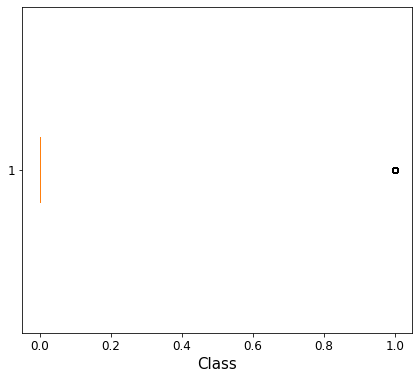

In [ ]:
# Plotting a boxplot---z_score
for col in range(len(new_data.columns)):
    fig, axes = plt.subplots(1,1,figsize=(7,6))
    axes.boxplot(new_df[new_data.columns[col]], vert=False, widths=0.2, patch_artist=True)
    axes.set_xlabel(new_data.columns[col], fontsize=15)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

#axes[1].boxplot(data[new_data.columns[col]], vert=False, widths=0.2)
#axes[1].set_xlabel(new_data.columns[col])

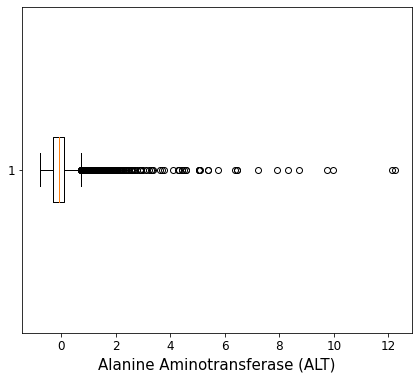

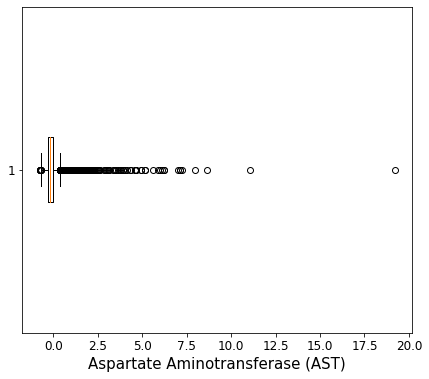

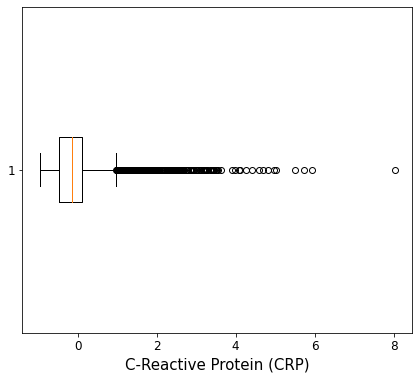

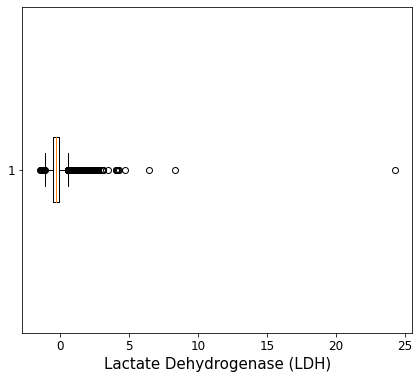

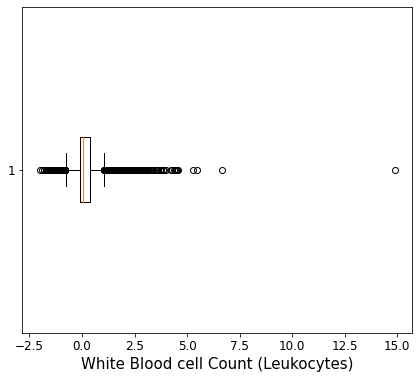

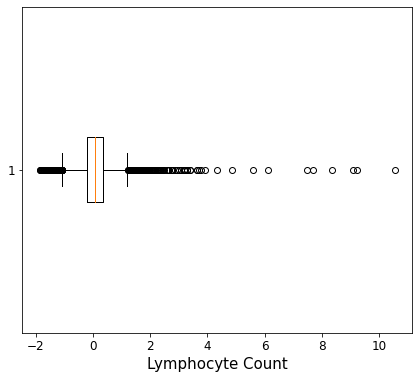

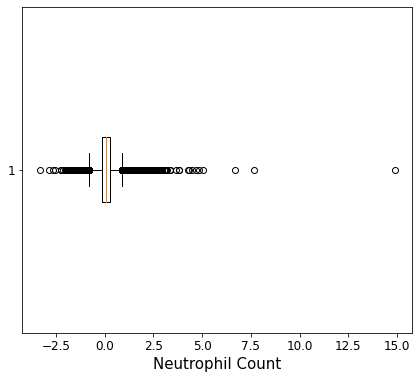

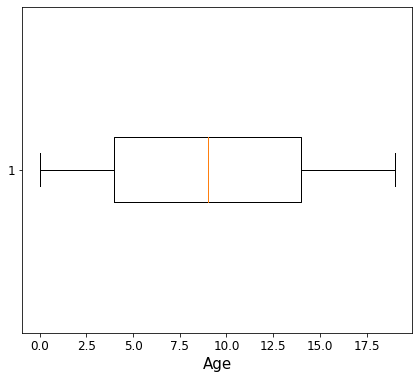

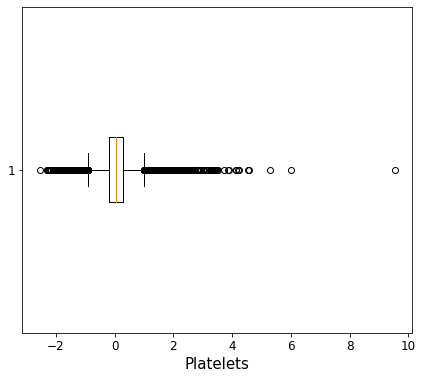

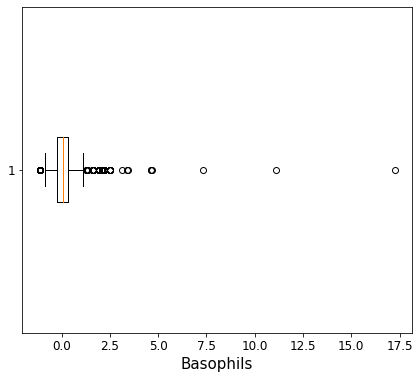

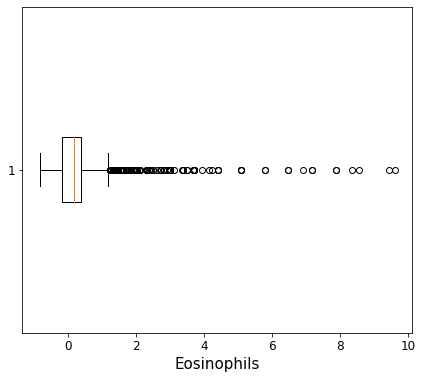

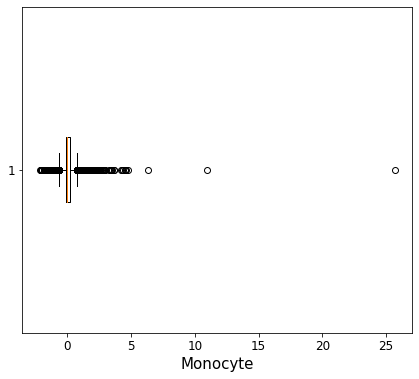

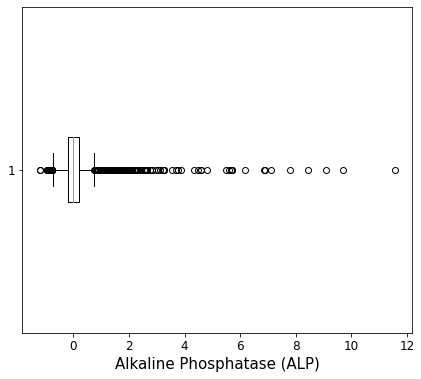

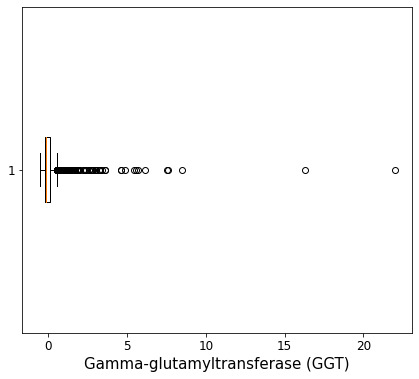

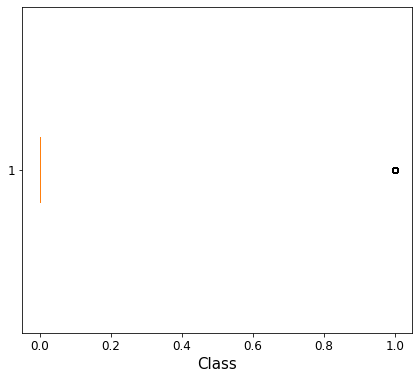

In [ ]:
# Plotting a boxplot---z_score
for col in range(len(new_data.columns)):
    fig, axes = plt.subplots(1,1,figsize=(7,6))
    axes.boxplot(data[new_data.columns[col]], vert=False, widths=0.2)
    axes.set_xlabel(new_data.columns[col], fontsize=15)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

In [ ]:
# Splitting dataset
y = new_df['Class']
X = new_df.drop(['Class'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,test_size=0.2, random_state=10)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5476, 14) (1369, 14) (5476,) (1369,)


## Algorithms

In [ ]:
#Libraries
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from datetime import datetime

from sklearn.metrics import accuracy_score, make_scorer, recall_score, f1_score, precision_score
from sklearn.model_selection import RepeatedStratifiedKFold, RandomizedSearchCV, cross_val_score

In [ ]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [ ]:
scores = {'Algos':['RFC', 'XGB','LGBM','CatB','VC'], 'Specificity':[], 'Sensitivity':[], 'Precision':[], 'F1':[]}

### RandomForest Classification

In [ ]:
rf_params={
 "max_depth"    : [3, 5, 8, 10, 12, 15],
 "n_estimators" : [5, 10, 20, 50, 100, 150]
}

def score(model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
    for train_idx, val_idx in cv.split(X_train,y_train):
        train_X, val_X = X_train.iloc[train_idx, :], X_train.iloc[val_idx, :]
        train_y, val_y = y_train.iloc[train_idx], y_train.iloc[val_idx]
        model.fit(train_X, train_y)
    
    specificity = make_scorer(recall_score, pos_label=0)
    spc_score = cross_val_score(model, X_test, y_test, cv=cv, scoring=specificity)

    sensitivity = make_scorer(recall_score, pos_label=1)
    sns_score = cross_val_score(model, X_test, y_test, cv=cv, scoring=sensitivity)
    
    prs_score = cross_val_score(model, X_test, y_test, cv=cv, scoring='precision')
    
    f1_score = cross_val_score(model, X_test, y_test, cv=cv, scoring='f1')

    return spc_score, sns_score, prs_score, f1_score

In [ ]:
#3 iter

model = RandomForestClassifier(random_state=1)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
random_search = RandomizedSearchCV(model, param_distributions=rf_params, n_iter=3,scoring='f1',n_jobs=-1,cv=cv, random_state=3)

start_time = timer(None)
random_search.fit(X_train,y_train)
timer(start_time)

print("Best Params: ",random_search.best_params_)
print("Best Estimator: ",random_search.best_estimator_.get_params())


 Time taken: 0 hours 0 minutes and 38.04 seconds.
Best Score:  88.36676565952396 

Best Params:  {'n_estimators': 20, 'max_depth': 12}
Best Estimator:  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 12, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 20, 'n_jobs': None, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}


In [ ]:
model_rf = RandomForestClassifier(n_estimators=20, max_depth=12, random_state=1)

spc, sns, prs, f1 = score(model_rf)

spc_score = round((np.mean(spc)*100.0),2)
sns_score = round((np.mean(sns)*100.0),2)
prs_score = round((np.mean(prs)*100.0),2)
f1_score = round((np.mean(f1)*100.0),2)

scores['Specificity'].append(spc_score)
scores['Sensitivity'].append(sns_score)
scores['Precision'].append(prs_score)
scores['F1'].append(f1_score)

print("Specificity: ")
print(spc_score,"%")
print("Sensitivity (Recall): ")
print(sns_score,"%")
print("Precision: ")
print(prs_score,"%")
print("F1-Score: ")
print(f1_score,"%")

Specificity: 
97.82 %
Sensitivity (Recall): 
84.4 %
Precision: 
89.97 %
F1-Score: 
86.81 %


###VC Params

In [ ]:
RF_ = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None, criterion='gini', max_depth=12, 
                             max_features='auto', max_leaf_nodes=None, max_samples=None, min_impurity_decrease=0.0, 
                             min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=20, 
                             n_jobs=None, oob_score=False, random_state=1, verbose=0, warm_start=False)

XGBOOST_ = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1, 
                         gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=5, min_child_weight=1, missing=None, 
                         n_estimators=100, n_jobs=1, nthread=None, objective='binary:logistic', random_state=1, reg_alpha=0, 
                         reg_lambda=1, scale_pos_weight=1, seed=None, silent=None, subsample=1, verbosity=1)

LGBM_ = LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0, importance_type='split', learning_rate=0.1,
                       max_depth=5, min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0, n_estimators=100, n_jobs=-1, 
                       num_leaves=31, objective=None, random_state=1, reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0, 
                       subsample_for_bin=200000, subsample_freq=0)

CATB_ = CatBoostClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=1)

models = [('RF',RF_),('XGBOOST',XGBOOST_),('LGBM',LGBM_), ('CATBOOST',CATB_)]


###Boosting Set Up

In [ ]:
params={
 "learning_rate"    : [0.01, 0.05, 0.10, 0.15, 0.20],
 "max_depth"        : [3, 5, 8, 10, 12, 15],
 "n_estimators"     : [5, 10, 20, 50, 100, 150] 
}

In [ ]:
#Cross Validate function
def cross_validate(model):
    
    if model=="xgb":
        model = XGBClassifier(random_state=1)
    if model=="lgbm":
        model = LGBMClassifier(random_state=1)
    if model=="catb":
        model = CatBoostClassifier(random_state=1)
    
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
    
    random_search = RandomizedSearchCV(model, param_distributions=params, n_iter=3,scoring='f1',n_jobs=-1,cv=cv, random_state=3)
    start_time = timer(None)
    random_search.fit(X_train,y_train)
    timer(start_time)
    
    return random_search

def score(model, n=None, d=None, r=None):
    if model=="xgb":
        classifier = XGBClassifier(n_estimators=n, max_depth=d, learning_rate=r, random_state=1)
    if model=="lgbm":
        classifier = LGBMClassifier(n_estimators=n, max_depth=d, learning_rate=r, random_state=1)
    if model=="catb":
        classifier = CatBoostClassifier(n_estimators=n, max_depth=d, learning_rate=r, random_strength=1)
    if model=="vc":
        classifier=VotingClassifier(estimators=models, voting='soft')
    
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
    
    for train_idx, val_idx in cv.split(X_train,y_train):
        train_X, val_X = X_train.iloc[train_idx, :], X_train.iloc[val_idx, :]
        train_y, val_y = y_train.iloc[train_idx], y_train.iloc[val_idx]
        classifier.fit(train_X, train_y)

    specificity = make_scorer(recall_score, pos_label=0)
    spc_score = cross_val_score(classifier, X_test, y_test, cv=cv, scoring=specificity)

    sensitivity = make_scorer(recall_score, pos_label=1)
    sns_score = cross_val_score(classifier, X_test, y_test, cv=cv, scoring=sensitivity)
    
    prs_score = cross_val_score(classifier, X_test, y_test, cv=cv, scoring='precision')
    
    f1_score = cross_val_score(classifier, X_test, y_test, cv=cv, scoring='f1')
    
    return spc_score, sns_score, prs_score, f1_score

### XGBoost Classifier

In [ ]:
random_search = cross_validate("xgb")  #3 iter


 Time taken: 0 hours 0 minutes and 34.92 seconds.


In [ ]:
print("Best Params: ",random_search.best_params_)
print("Best Estimator: ",random_search.best_estimator_.get_params())

Best Params:  {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}
Best Estimator:  {'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 5, 'min_child_weight': 1, 'missing': None, 'n_estimators': 100, 'n_jobs': 1, 'nthread': None, 'objective': 'binary:logistic', 'random_state': 1, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': None, 'subsample': 1, 'verbosity': 1}


In [ ]:
spc, sns, prs, f1 = score("xgb", 100, 5, 0.1)

In [ ]:
spc_score = round((np.mean(spc)*100.0), 2)
sns_score = round((np.mean(sns)*100.0),2)
prs_score = round((np.mean(prs)*100.0),2)
f1_score = round((np.mean(f1)*100.0),2)

scores['Specificity'].append(spc_score)
scores['Sensitivity'].append(sns_score)
scores['Precision'].append(prs_score)
scores['F1'].append(f1_score)

print("Specificity: ")
print(spc_score,"%")
print("Sensitivity (Recall): ")
print(sns_score,"%")
print("Precision: ")
print(prs_score,"%")
print("F1-Score: ")
print(f1_score,"%")

Specificity: 
97.43 %
Sensitivity (Recall): 
85.84 %
Precision: 
88.5 %
F1-Score: 
86.91 %


### LGBM Classifier

In [ ]:
random_search = cross_validate("lgbm")   # 3 iter


 Time taken: 0 hours 0 minutes and 16.27 seconds.


In [ ]:
print("Best Params: ",random_search.best_params_)
print("Best Estimator: ",random_search.best_estimator_.get_params())

Best Params:  {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}
Best Estimator:  {'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': 5, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': 1, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0}


In [ ]:
spc, sns, prs, f1 = score("lgbm", 100, 5, 0.1)

In [ ]:
spc_score = round((np.mean(spc)*100.0), 2)
sns_score = round((np.mean(sns)*100.0),2)
prs_score = round((np.mean(prs)*100.0),2)
f1_score = round((np.mean(f1)*100.0),2)

scores['Specificity'].append(spc_score)
scores['Sensitivity'].append(sns_score)
scores['Precision'].append(prs_score)
scores['F1'].append(f1_score)

print("Specificity: ")
print(spc_score,"%")
print("Sensitivity (Recall): ")
print(sns_score,"%")
print("Precision: ")
print(prs_score,"%")
print("F1-Score: ")
print(f1_score,"%")

Specificity: 
97.59 %
Sensitivity (Recall): 
87.04 %
Precision: 
89.29 %
F1-Score: 
87.91 %


### CatBoost Classifier

In [ ]:
random_search = cross_validate("catb") # 3 iter

0:	learn: 0.6184681	total: 49.9ms	remaining: 4.94s
1:	learn: 0.5568714	total: 52.9ms	remaining: 2.59s
2:	learn: 0.5033236	total: 55.9ms	remaining: 1.81s
3:	learn: 0.4574514	total: 58.8ms	remaining: 1.41s
4:	learn: 0.4179424	total: 61.7ms	remaining: 1.17s
5:	learn: 0.3835122	total: 64.5ms	remaining: 1.01s
6:	learn: 0.3532846	total: 67.5ms	remaining: 897ms
7:	learn: 0.3282242	total: 70.4ms	remaining: 809ms
8:	learn: 0.3047873	total: 73.3ms	remaining: 741ms
9:	learn: 0.2844279	total: 76.2ms	remaining: 686ms
10:	learn: 0.2665937	total: 79.1ms	remaining: 640ms
11:	learn: 0.2506030	total: 82ms	remaining: 601ms
12:	learn: 0.2359542	total: 84.9ms	remaining: 568ms
13:	learn: 0.2228487	total: 87.9ms	remaining: 540ms
14:	learn: 0.2119885	total: 90.9ms	remaining: 515ms
15:	learn: 0.2016772	total: 93.8ms	remaining: 493ms
16:	learn: 0.1934343	total: 96.8ms	remaining: 473ms
17:	learn: 0.1857300	total: 99.7ms	remaining: 454ms
18:	learn: 0.1774302	total: 103ms	remaining: 438ms
19:	learn: 0.1698800	tota

In [ ]:
print("Best Params: ",random_search.best_params_)
print("Best Estimator: ",random_search.best_estimator_.get_params())

Best Params:  {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}
Best Estimator:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'random_state': 1}


In [ ]:
spc, sns, prs, f1 = score("catb", 100, 5, 0.1)

Streaming output truncated to the last 5000 lines.
0:	learn: 0.6237912	total: 2.29ms	remaining: 227ms
1:	learn: 0.5652923	total: 4.73ms	remaining: 232ms
2:	learn: 0.5171734	total: 7.04ms	remaining: 227ms
3:	learn: 0.4747634	total: 9.33ms	remaining: 224ms
4:	learn: 0.4364339	total: 11.7ms	remaining: 221ms
5:	learn: 0.4049961	total: 16.5ms	remaining: 258ms
6:	learn: 0.3755411	total: 20.1ms	remaining: 268ms
7:	learn: 0.3496768	total: 26ms	remaining: 299ms
8:	learn: 0.3261487	total: 29.2ms	remaining: 295ms
9:	learn: 0.3084323	total: 32.8ms	remaining: 295ms
10:	learn: 0.2905175	total: 36ms	remaining: 291ms
11:	learn: 0.2730824	total: 38.6ms	remaining: 283ms
12:	learn: 0.2577786	total: 40.9ms	remaining: 274ms
13:	learn: 0.2435692	total: 43.5ms	remaining: 267ms
14:	learn: 0.2307656	total: 45.8ms	remaining: 260ms
15:	learn: 0.2195395	total: 48.1ms	remaining: 253ms
16:	learn: 0.2094574	total: 50.4ms	remaining: 246ms
17:	learn: 0.2010800	total: 52.7ms	remaining: 240ms
18:	learn: 0.1925437	total:

In [ ]:
spc_score = round((np.mean(spc)*100.0), 2)
sns_score = round((np.mean(sns)*100.0),2)
prs_score = round((np.mean(prs)*100.0),2)
f1_score = round((np.mean(f1)*100.0),2)

scores['Specificity'].append(spc_score)
scores['Sensitivity'].append(sns_score)
scores['Precision'].append(prs_score)
scores['F1'].append(f1_score)

print("Specificity: ")
print(spc_score,"%")
print("Sensitivity (Recall): ")
print(sns_score,"%")
print("Precision: ")
print(prs_score,"%")
print("F1-Score: ")
print(f1_score,"%")

Specificity: 
97.35 %
Sensitivity (Recall): 
85.92 %
Precision: 
88.18 %
F1-Score: 
86.8 %


### Voting Classifier

In [ ]:
spc, sns, prs, f1 = score("vc")

Streaming output truncated to the last 5000 lines.
0:	learn: 0.6240556	total: 2.53ms	remaining: 250ms
1:	learn: 0.5643625	total: 5.39ms	remaining: 264ms
2:	learn: 0.5163053	total: 7.77ms	remaining: 251ms
3:	learn: 0.4741475	total: 10.1ms	remaining: 243ms
4:	learn: 0.4348772	total: 12.4ms	remaining: 236ms
5:	learn: 0.4000997	total: 14.7ms	remaining: 231ms
6:	learn: 0.3701451	total: 18ms	remaining: 239ms
7:	learn: 0.3441336	total: 24.3ms	remaining: 280ms
8:	learn: 0.3212441	total: 29.2ms	remaining: 296ms
9:	learn: 0.3006228	total: 35.6ms	remaining: 320ms
10:	learn: 0.2831266	total: 37.7ms	remaining: 305ms
11:	learn: 0.2665637	total: 39.8ms	remaining: 292ms
12:	learn: 0.2525276	total: 42ms	remaining: 281ms
13:	learn: 0.2393953	total: 44ms	remaining: 271ms
14:	learn: 0.2285171	total: 46.1ms	remaining: 261ms
15:	learn: 0.2173807	total: 48.2ms	remaining: 253ms
16:	learn: 0.2071424	total: 50.4ms	remaining: 246ms
17:	learn: 0.1979966	total: 52.4ms	remaining: 239ms
18:	learn: 0.1895484	total: 5

In [ ]:
spc_score = round((np.mean(spc)*100.0), 2)
sns_score = round((np.mean(sns)*100.0),2)
prs_score = round((np.mean(prs)*100.0),2)
f1_score = round((np.mean(f1)*100.0),2)

scores['Specificity'].append(spc_score)
scores['Sensitivity'].append(sns_score)
scores['Precision'].append(prs_score)
scores['F1'].append(f1_score)

print("Specificity: ")
print(spc_score,"%")
print("Sensitivity (Recall): ")
print(sns_score,"%")
print("Precision: ")
print(prs_score,"%")
print("F1-Score: ")
print(f1_score,"%")

Specificity: 
97.53 %
Sensitivity (Recall): 
86.64 %
Precision: 
89.04 %
F1-Score: 
87.58 %


###Graphs

In [ ]:
results = pd.DataFrame(scores)
results

,Algos,Specificity,Sensitivity,Precision,F1
0,RFC,97.82,84.40,89.97,86.81
1,XGB,97.43,85.84,88.50,86.91
2,LGBM,97.59,87.04,89.29,87.91
3,CatB,97.35,85.92,88.18,86.80
4,VC,97.53,86.64,89.04,87.58


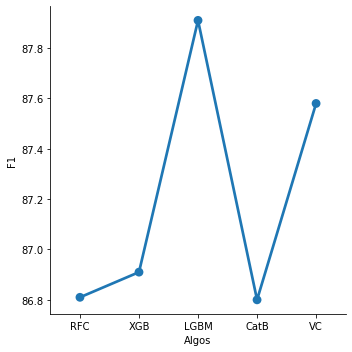

In [ ]:
sns.catplot(x='Algos', y="F1", data=results, kind="point")

In [ ]:
resm = results.melt('Algos', var_name='Metrics', value_name='values')
resm

In [ ]:
sns.catplot(x='Algos', y="values", hue="Metrics", data=resm, kind="point").set(title="Combined Data")